In [18]:
import torch
import matplotlib.pyplot as plt

In [14]:
#读取数据
name="resblock_32conv_noupdown_500epoch_with_batchnorm"
PSNR_name=[f".\\data\\problem3\\{name}_PSNR.pth"]#shape:n
SSIM_name=[f".\\data\\problem3\\{name}_SSIM.pth"]#shape:n
loss_train_name=[f".\\data\\problem3\\{name}_loss_train.pth"]#shape:n
loss_val_name=[f".\\data\\problem3\\{name}_loss_val.pth"]#shape:n
PSNR_list=[]
SSIM_list=[]
loss_train_list=[]
loss_val_list=[]
for name in PSNR_name:
    PSNR_list.append(torch.load(name))
for name in SSIM_name:
    SSIM_list.append(torch.load(name))
for name in loss_train_name:
    loss_train_list.append(torch.load(name))
for name in loss_val_name:
    loss_val_list.append(torch.load(name))

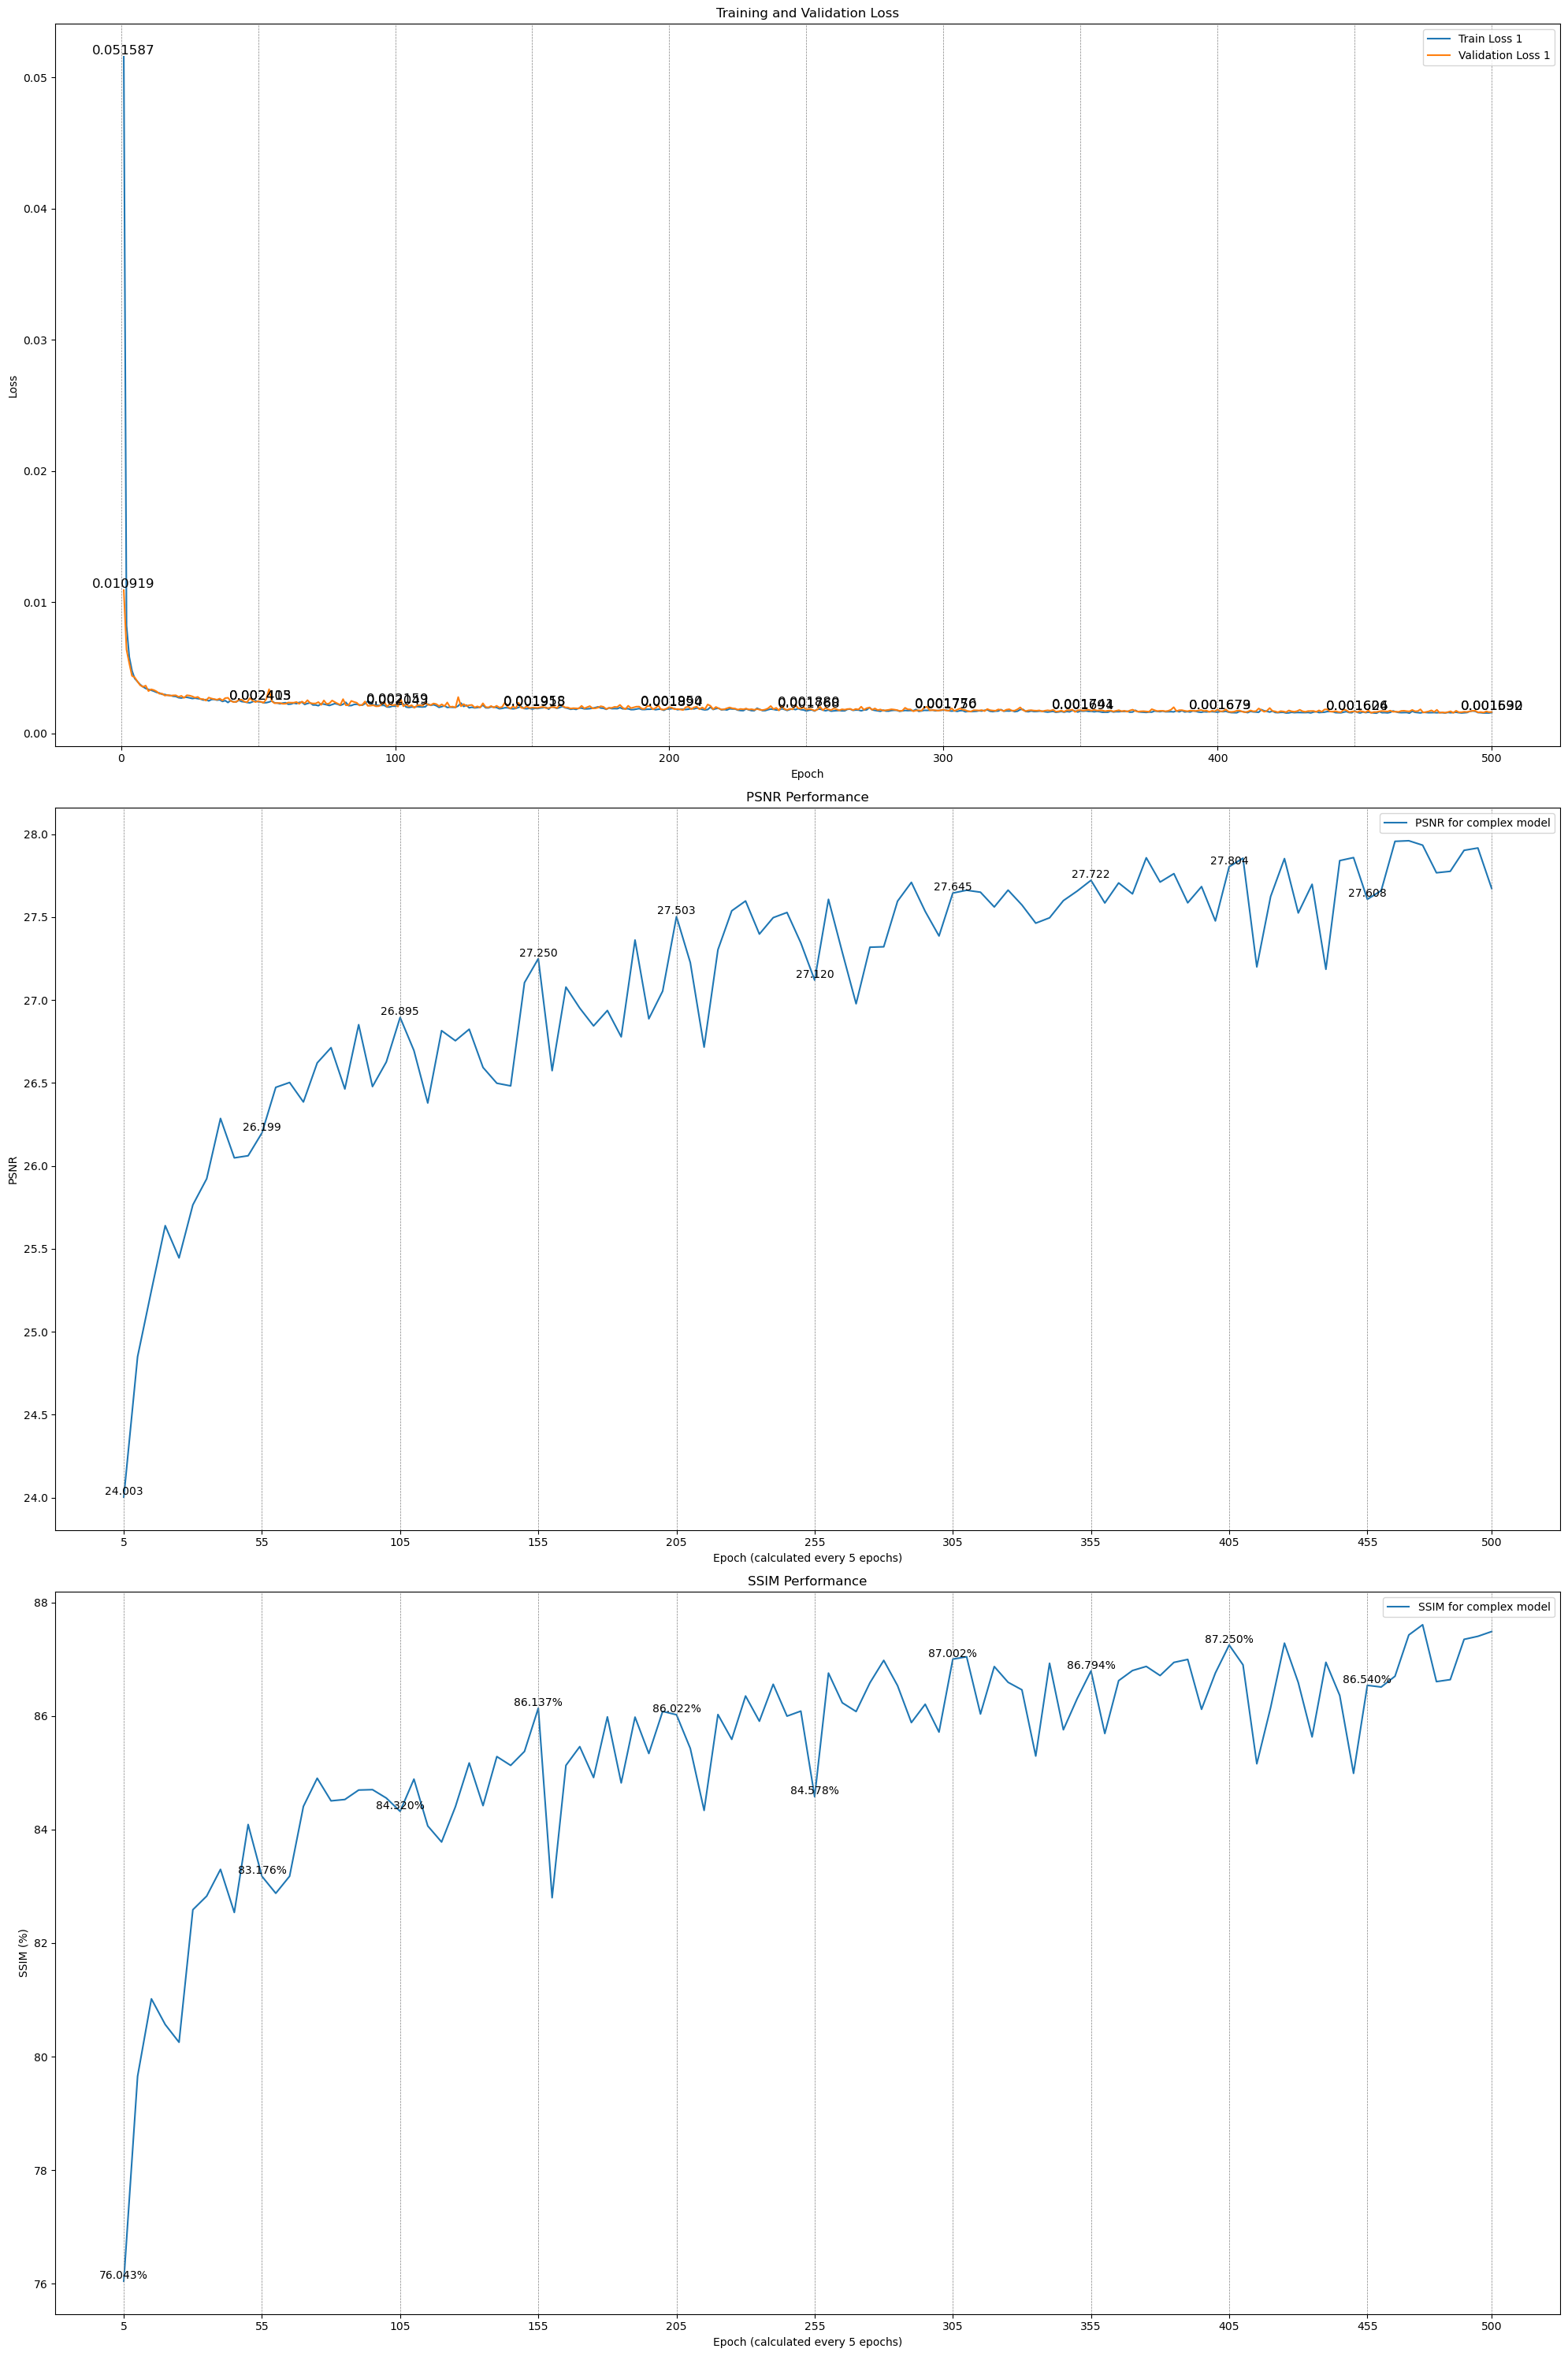

In [15]:
import matplotlib.pyplot as plt
length_of_data=len(loss_train_list[0])
# 创建一个大画布和三个子图
fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, ncols=1, figsize=(20, 30))

# 绘制训练损失和验证损失
length_of_data_loss = len(loss_train_list[0])
x_ticks_loss = [i for i in range(1, length_of_data_loss + 1)]
for i in range(len(loss_train_list)):
    ax1.plot(x_ticks_loss, loss_train_list[i], label=f'Train Loss {i+1}')
    ax1.plot(x_ticks_loss, loss_val_list[i], label=f'Validation Loss {i+1}')
for i in range(1, length_of_data_loss + 2, 50):
    ax1.axvline(x=i-1, color='gray', linestyle='--', linewidth=0.5)
for i in range(0, length_of_data_loss):
    if (i) % 50 == 0 or i == length_of_data_loss - 1 or i == 0:
        ax1.text(x_ticks_loss[i], loss_train_list[0][i], f'{loss_train_list[0][i]:.6f}', ha='center', va='bottom', fontsize=12)
        ax1.text(x_ticks_loss[i], loss_val_list[0][i], f'{loss_val_list[0][i]:.6f}', ha='center', va='bottom', fontsize=12)
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.set_title('Training and Validation Loss')
ax1.legend()

# 绘制PSNR
length_of_data_psnr = len(PSNR_list[0])
x_ticks_psnr = [5 * (i + 1) for i in range(length_of_data_psnr)]
ax2.plot(x_ticks_psnr, PSNR_list[0], label="PSNR for complex model")
ax2.set_xticks(x_ticks_psnr[0::10] + [x_ticks_psnr[-1]])
ax2.set_xlabel('Epoch (calculated every 5 epochs)')
ax2.set_ylabel('PSNR')
ax2.set_title('PSNR Performance')
ax2.legend()
for i in range(1, length_of_data_psnr + 1, 10):
    ax2.axvline(x=5 * i, color='gray', linestyle='--', linewidth=0.5)
ax2.axvline(x=length_of_data_psnr * 5, color='gray', linestyle='--', linewidth=0.5)
for i in range(length_of_data_psnr):
    if (i) % 10 == 0 or i == length_of_data - 1:
        ax2.text(x_ticks_psnr[i], PSNR_list[0][i], f'{PSNR_list[0][i]:.3f}', ha='center', va='bottom')

# 绘制SSIM
ax3.plot(x_ticks_psnr, [100 * ssim for ssim in SSIM_list[0]], label="SSIM for complex model")
ax3.set_xticks(x_ticks_psnr[0::10] + [x_ticks_psnr[-1]])
ax3.set_xlabel('Epoch (calculated every 5 epochs)')
ax3.set_ylabel('SSIM (%)')
ax3.set_title('SSIM Performance')
ax3.legend()
for i in range(1, length_of_data_psnr + 1, 10):
    ax3.axvline(x=5 * i, color='gray', linestyle='--', linewidth=0.5)
ax3.axvline(x=length_of_data_psnr * 5, color='gray', linestyle='--', linewidth=0.5)
for i in range(length_of_data_psnr):
    if (i) % 10 == 0 or i == length_of_data - 1:
        ax3.text(x_ticks_psnr[i], SSIM_list[0][i]*100, f'{SSIM_list[0][i]*100:.3f}%', ha='center', va='bottom')
plt.tight_layout()
plt.show()


C:\Users\cao\AppData\Local\Temp\ipykernel_4740\95844660.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


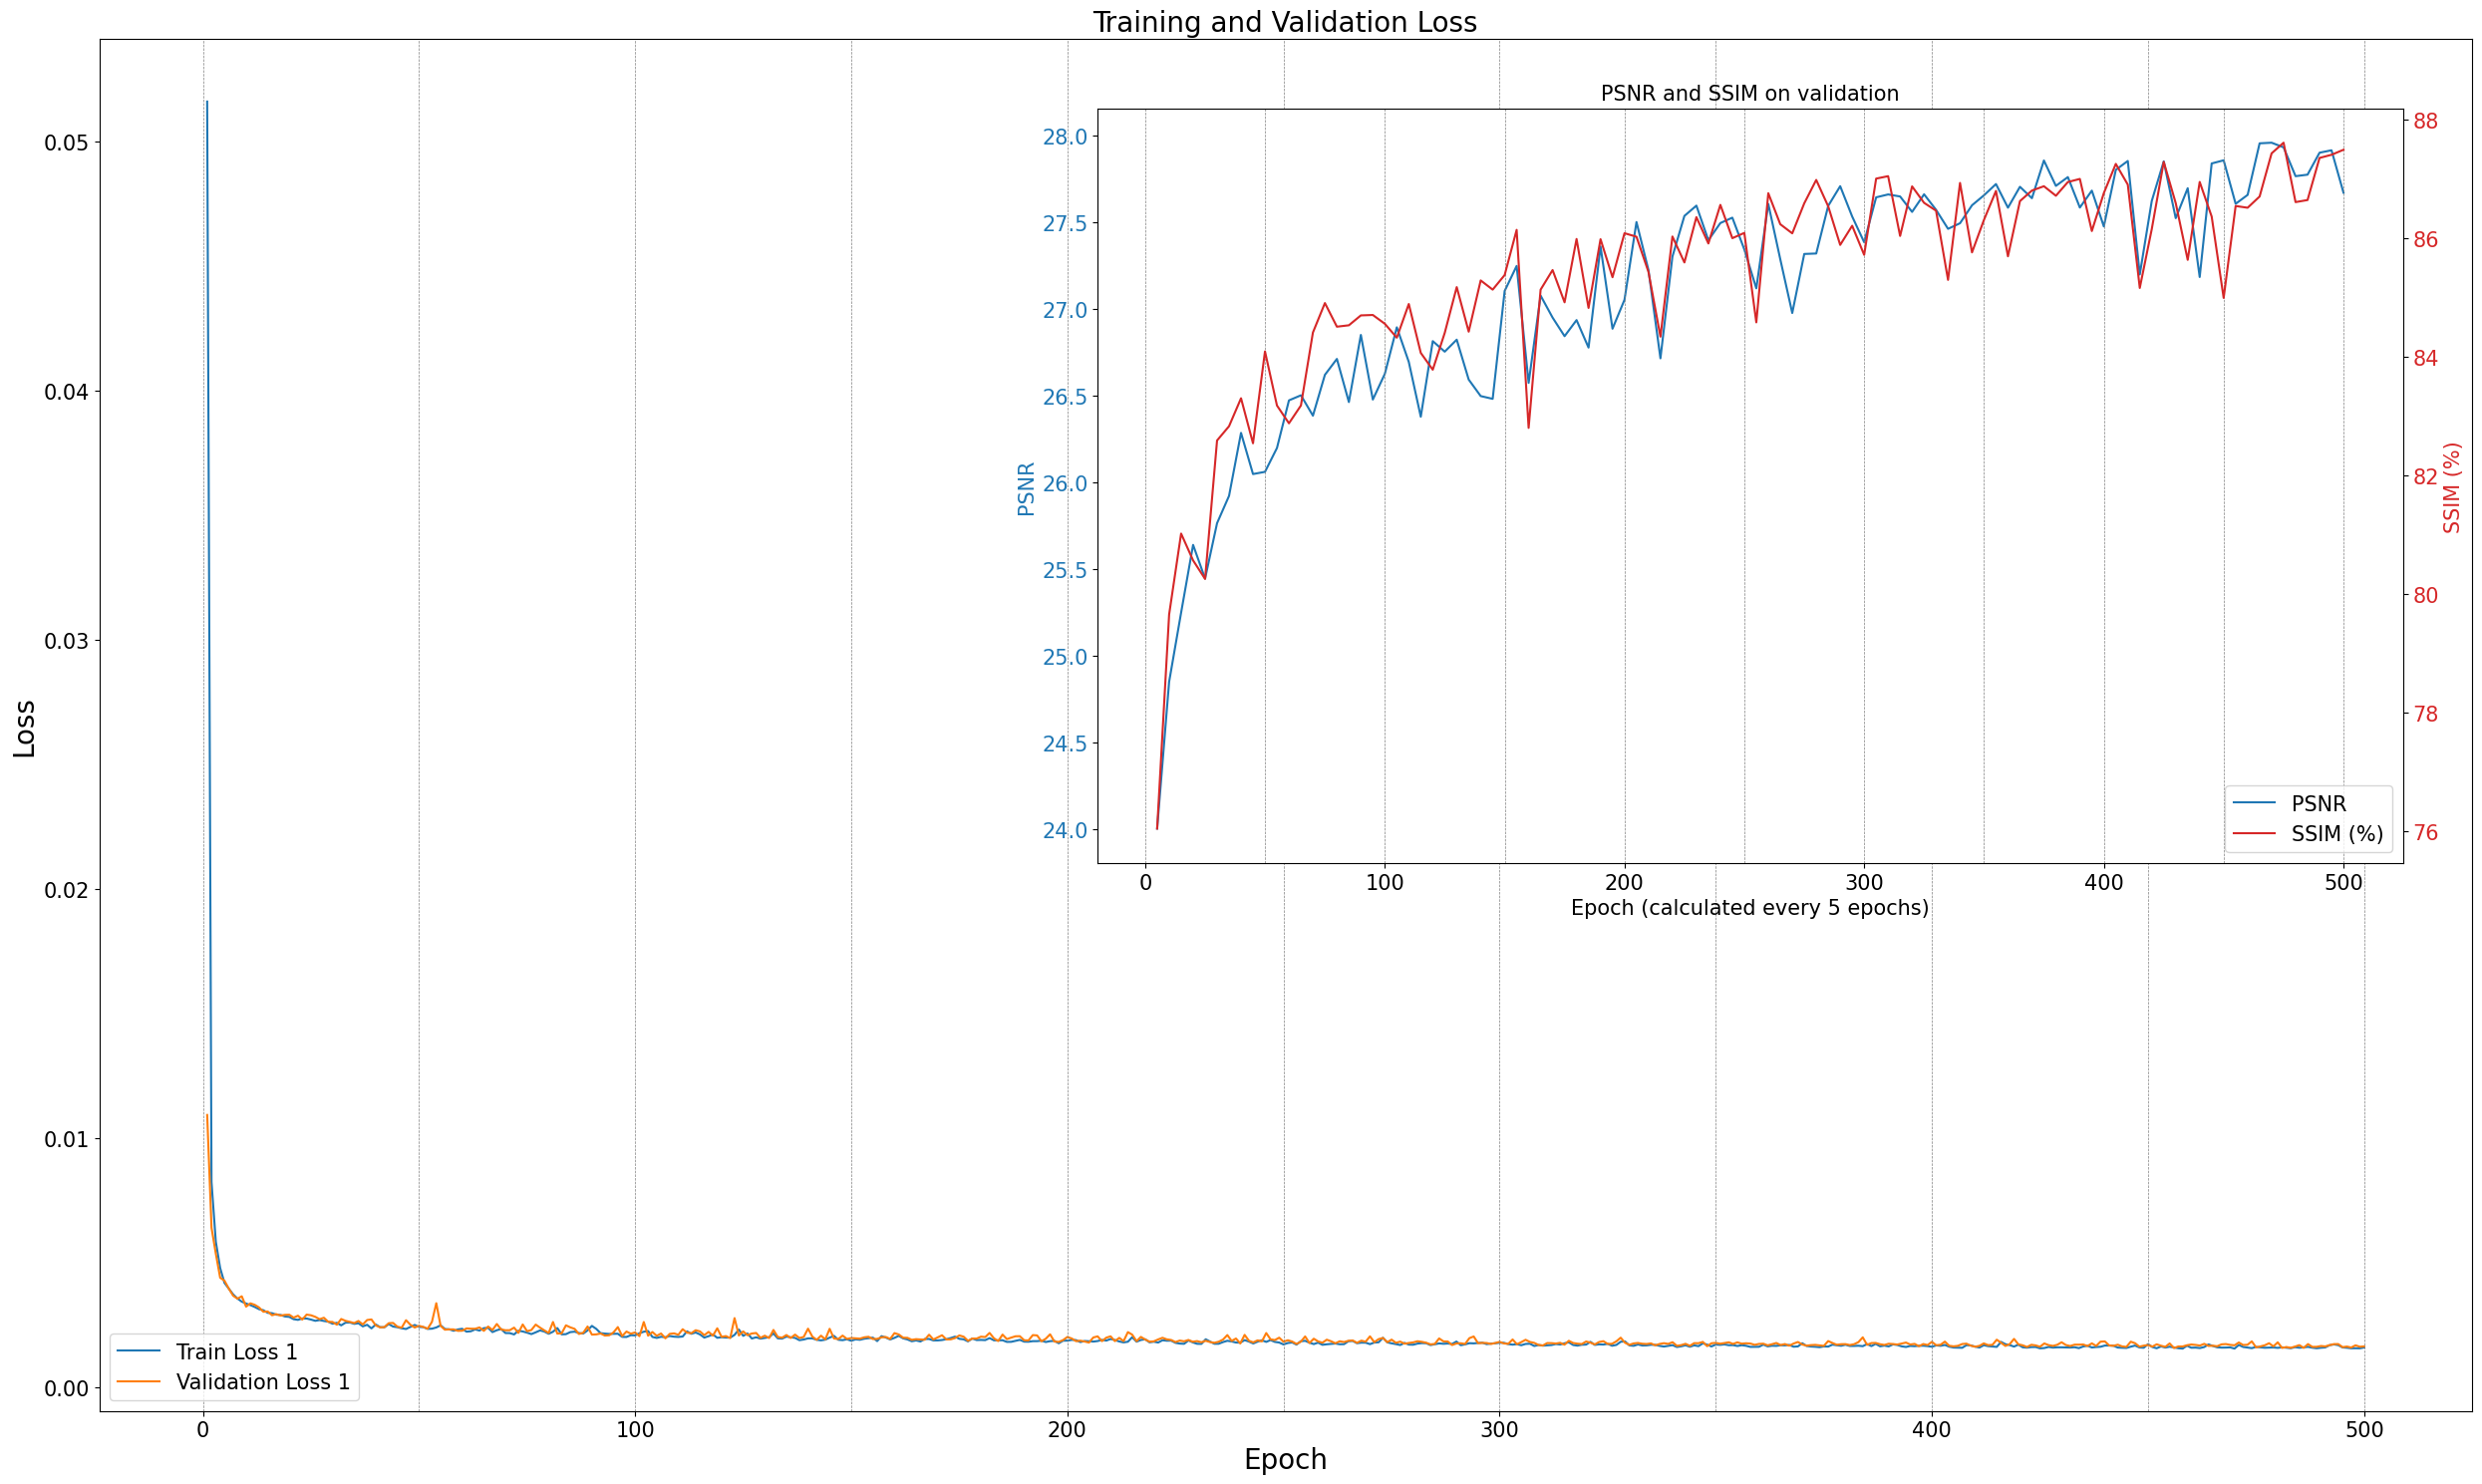

In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
fig, ax_loss = plt.subplots(figsize=(25, 15))

# 绘制训练损失和验证损失
length_of_data_loss = len(loss_train_list[0])
x_ticks_loss = [i for i in range(1, length_of_data_loss + 1)]
for i in range(len(loss_train_list)):
    ax_loss.plot(x_ticks_loss, loss_train_list[i], label=f'Train Loss {i+1}')
    ax_loss.plot(x_ticks_loss, loss_val_list[i], label=f'Validation Loss {i+1}')
for i in range(1, length_of_data_loss + 2, 50):
    ax_loss.axvline(x=i-1, color='gray', linestyle='--', linewidth=0.5)
ax_loss.set_xlabel('Epoch', fontsize=20)
ax_loss.set_ylabel('Loss', fontsize=20)
ax_loss.set_title('Training and Validation Loss', fontsize=20)
ax_loss.tick_params(axis='x', labelsize=15)
ax_loss.tick_params(axis='y', labelsize=15)
ax_loss.legend(loc='lower left', fontsize=15)
# 创建PSNR和SSIM的插图
ax_inset = inset_axes(ax_loss, width="55%", height="55%", loc='upper right', borderpad=5)
ax_psnr = ax_inset
ax_ssim = ax_psnr.twinx()
ax_inset.tick_params(axis='x', labelsize=15)
# 绘制PSNR
ax_psnr.plot(x_ticks_psnr, PSNR_list[0], label="PSNR", color='tab:blue')
ax_psnr.set_ylabel('PSNR', color='tab:blue', fontsize=15)
ax_psnr.tick_params(axis='y', labelcolor='tab:blue', labelsize=15)

# 绘制SSIM
ax_ssim.plot(x_ticks_psnr, [100 * ssim for ssim in SSIM_list[0]], label="SSIM", color='tab:red')
ax_ssim.set_ylabel('SSIM (%)', color='tab:red', fontsize=15)
ax_ssim.tick_params(axis='y', labelcolor='tab:red', labelsize=15)

# 在子图中添加纵向的虚线，与主图同步
for i in range(1, length_of_data_loss + 2, 50):
    ax_psnr.axvline(x=i-1, color='gray', linestyle='--', linewidth=0.5)
ax_inset.legend([ax_psnr.get_lines()[0], ax_ssim.get_lines()[0]], ['PSNR', 'SSIM (%)'], loc='lower right', fontsize=15)
ax_inset.set_title('PSNR and SSIM on validation', fontsize=15)
ax_inset.set_xlabel('Epoch (calculated every 5 epochs)', fontsize=15)
plt.tight_layout()
plt.show()


In [51]:
#读取数据
namelist=["resblock_128conv_withupdown_500epoch",
          "resblock_128conv_withupdown_500epoch_SGDlr0.01"]
PSNR_list=[]
SSIM_list=[]
loss_train_list=[]
loss_val_list=[]
for str in namelist:
    PSNR_name=[f".\\data\\problem3\\{str}_PSNR.pth"]#shape:n
    SSIM_name=[f".\\data\\problem3\\{str}_SSIM.pth"]#shape:n
    loss_train_name=[f".\\data\\problem3\\{str}_loss_train.pth"]#shape:n
    loss_val_name=[f".\\data\\problem3\\{str}_loss_val.pth"]#shape:n
    for name in PSNR_name:
        PSNR_list.append(torch.load(name))
    for name in SSIM_name:
        SSIM_list.append(torch.load(name))
    for name in loss_train_name:
        loss_train_list.append(torch.load(name))
    for name in loss_val_name:
        loss_val_list.append(torch.load(name))

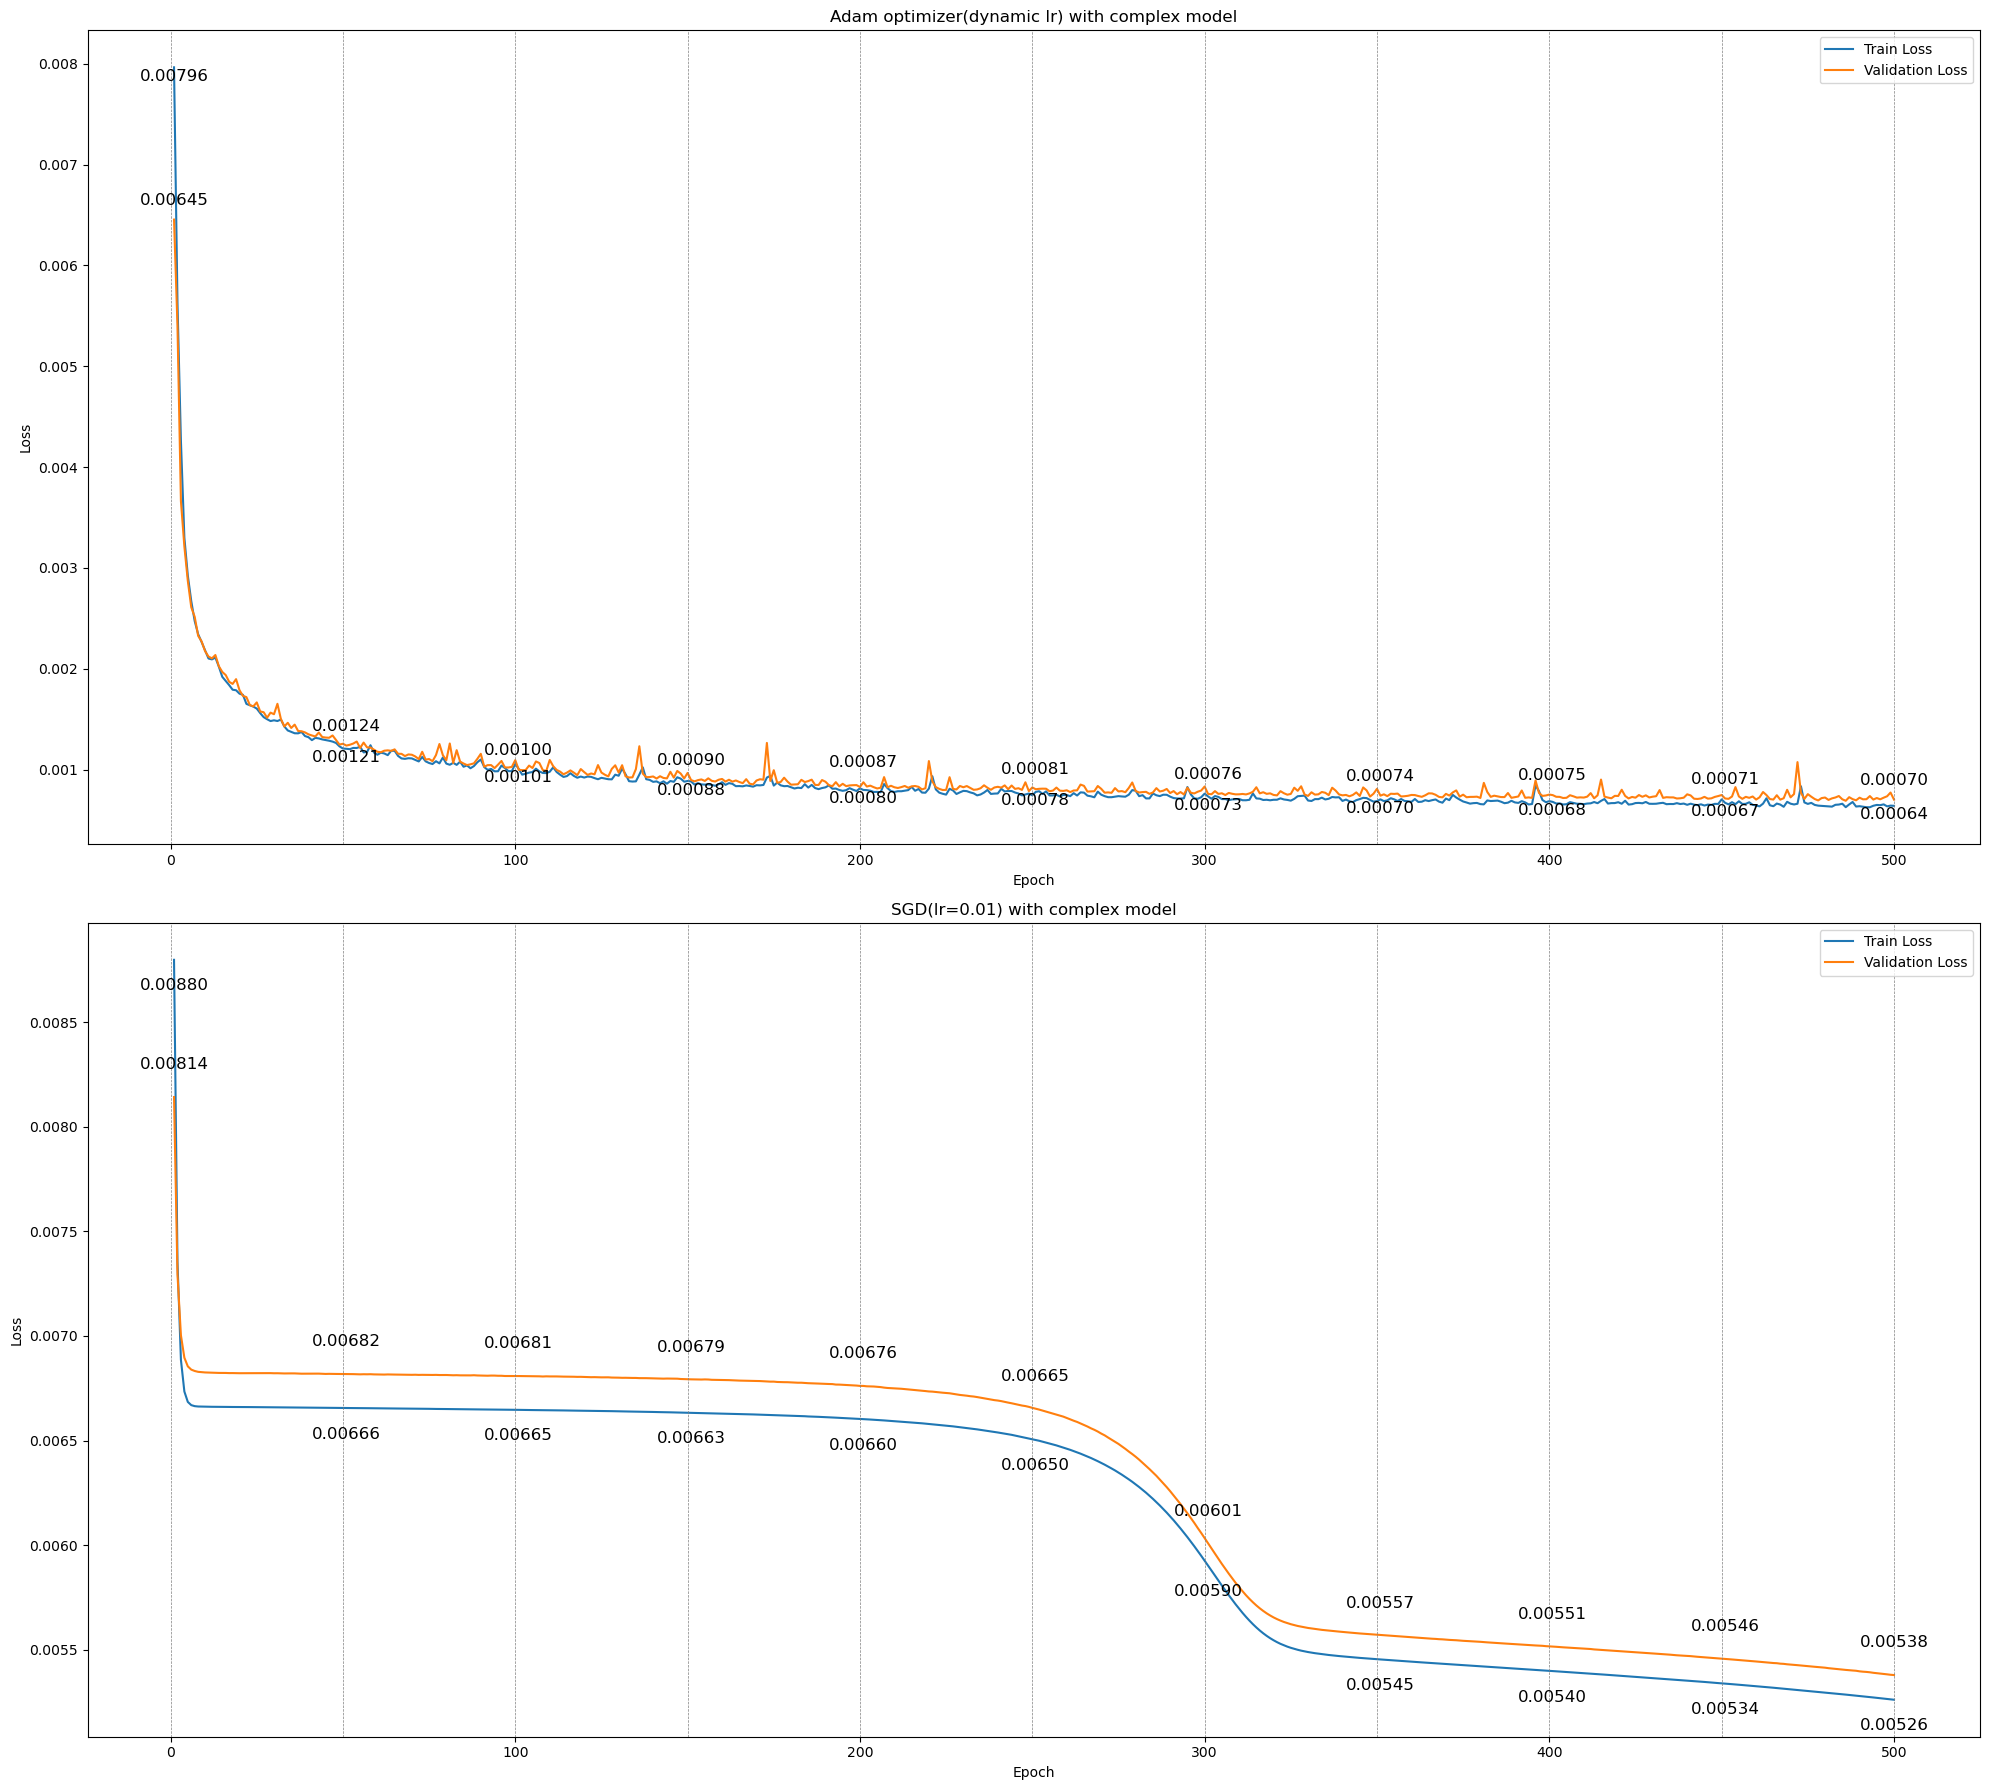

In [53]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 18))

# 给每个子图绘制训练损失和验证损失
for i, ax in enumerate(axes):
    x_ticks = range(1, len(loss_train_list[i]) + 1)
    
    # 绘制训练损失和验证损失
    ax.plot(x_ticks, loss_train_list[i], label='Train Loss')
    ax.plot(x_ticks, loss_val_list[i], label='Validation Loss')
    
    # 每50个epoch画一条虚线
    for j in range(1, len(loss_train_list[i]) + 2, 50):
        ax.axvline(x=j-1, color='gray', linestyle='--', linewidth=0.5)
    
    # 显示数据
    for k in range(0, len(loss_train_list[i])):
        if (k) % 50 == 0 or k == len(loss_train_list[i]) - 1 or k == 0:
            ax.text(x_ticks[k], loss_train_list[i][k]-0.0001605, f'{loss_train_list[i][k]:.5f}', ha='center', va='bottom', fontsize=12)
            ax.text(x_ticks[k], loss_val_list[i][k]+0.0001175, f'{loss_val_list[i][k]:.5f}', ha='center', va='bottom', fontsize=12)
    
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()
axes[0].set_title('Adam optimizer(dynamic lr) with complex model')
axes[1].set_title('SGD(lr=0.01) with complex model')
plt.tight_layout()
plt.show()
